**Defining the PDE**

In [1]:
import deepxde as dde
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

nu = 0.0006
rho = 1.2
R = 0.025

def pde(x, y):
    u, v, p = y[:, 0:1], y[:, 1:2], y[:, 2:3]
    u_t = dde.grad.jacobian(y, x, i=0, j=2)
    v_t = dde.grad.jacobian(y, x, i=1, j=2)
    u_x = dde.grad.jacobian(y, x, i=0, j=0)
    u_y = dde.grad.jacobian(y, x, i=0, j=1)
    v_x = dde.grad.jacobian(y, x, i=1, j=0)
    v_y = dde.grad.jacobian(y, x, i=1, j=1)
    u_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    u_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    v_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    v_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    p_x = dde.grad.jacobian(y, x, i=2, j=0)
    p_y = dde.grad.jacobian(y, x, i=2, j=1)
    
    f = rho*(u_t + u * u_x + v * u_y )+ p_x - nu * (u_xx + u_yy)
    g = rho*(v_t + u * v_x + v * v_y )+ p_y - nu * (v_xx + v_yy)
    h = u_x + v_y
    return [f, g, h]

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


**Domain = Rectangle - cylinder**

In [7]:
x = X.to_numpy().flatten()
y = Y.to_numpy().flatten()
t = Time.to_numpy().flatten()
u = U.to_numpy().flatten()
v = V.to_numpy().flatten()

# Min-Max Normalization for x and y
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)
x_center = (- x_min) / (x_max - x_min)
y_center = (- y_min) / (y_max - y_min)
print(x.min())
print(x.max())
print(y.min())
print(y.max())

0.0
1.0
0.0
1.0


In [8]:
rectangle = dde.geometry.Rectangle([0,0], [1, 1])
cylinder =  dde.geometry.Disk([x_center, y_center], R /(x_max-x_min))
geom = rectangle - cylinder
timedomain = dde.geometry.TimeDomain(0,8)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

**Plot of the domain**

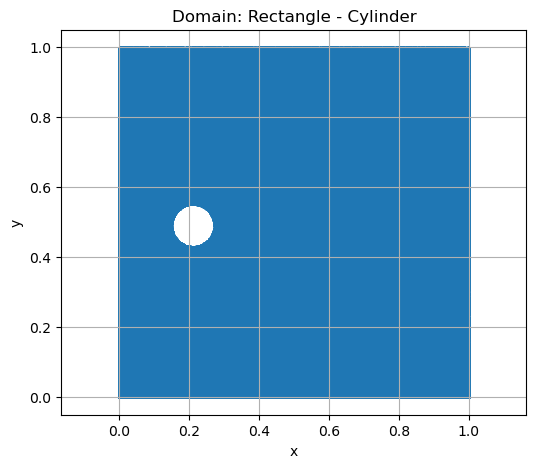

In [9]:
num_points = 1000000
X = geom.random_points(num_points)

# Plot the domain
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1],s=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Domain: Rectangle - Cylinder")
plt.grid(True)
plt.axis("equal")
plt.show()

**Prepare the data**

In [3]:
import pandas as pd
# Chemin vers le fichier CSV
file_path = 'fi.csv'

# Lire le fichier CSV
data2 = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame
print(data2.head())

   Time  Points:0  Points:1  Points:2  Pressure  Velocity:0  Velocity:1  \
0   0.0 -0.008839  0.008839       0.0       0.0         1.0      0.0001   
1   0.0  0.008839  0.008839       0.0       0.0         1.0      0.0001   
2   0.0  0.008839 -0.008839       0.0       0.0         1.0      0.0001   
3   0.0 -0.008839 -0.008839       0.0       0.0         1.0      0.0001   
4   0.0 -0.055000  0.055000       0.0       0.0         1.0      0.0001   

   Velocity:2  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [6]:
# Extraction des colonnes
Time = data2['Time']
X = data2['Points:0']
Y = data2['Points:1']
U = data2['Velocity:0']
V = data2['Velocity:1']

X_unique = X.drop_duplicates().reset_index(drop=True)
T_unique = Time.drop_duplicates().reset_index(drop=True)
N = X_unique.shape[0]
T = T_unique.shape[0]
print(N,T)
print(X.shape)
print(Y.shape)
print(Time.shape)
print(U.shape)
print(V.shape)
print(X.shape[0])

4134 327
(5874882,)
(5874882,)
(5874882,)
(5874882,)
(5874882,)
5874882


In [12]:


x = x.flatten()[:,None]
y = y.flatten()[:,None]
t = t.flatten()[:,None]
u = u.flatten()[:,None]
v = v.flatten()[:,None]
# Min-Max Normalization for x and y
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)

# Z-Score Normalization for u and v
u_mean, u_std = u.mean(), u.std()
v_mean, v_std = v.mean(), v.std()

u = (u - u_mean) / u_std
v = (v - v_mean) / v_std
u_0 = (1 - u_mean) / u_std
v_0 = (0.0001 - v_mean) / v_std

print(x.min())
print(x.max())

0.0
1.0


In [13]:
print(len(x))
print(len(y))
print(len(t))

5874882
5874882
5874882


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from matplotlib.patches import Circle

# Load your data
# Assuming you have data loaded as X, Y, Time, U, V
# Here, we just use placeholders for these arrays

# Convert to numpy arrays and flatten
x = X.to_numpy().flatten()
y = Y.to_numpy().flatten()
t = Time.to_numpy().flatten()
u = U.to_numpy().flatten()
v = V.to_numpy().flatten()

# Min-Max Normalization for x and y
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x_norm = (x - x_min) / (x_max - x_min)
y_norm = (y - y_min) / (y_max - y_min)

# Z-Score Normalization for u and v
u_mean, u_std = u.mean(), u.std()
v_mean, v_std = v.mean(), v.std()

u_norm = (u - u_mean) / u_std
v_norm = (v - v_mean) / v_std
u_0 = (1 - u_mean) / u_std
v_0 = (0.0001 - v_mean) / v_std


# Define grid
x_unique = np.linspace(x_norm.min(), x_norm.max(), 50)￼
y_unique = np.linspace(y_norm.min(), y_norm.max(), 50)
XX_test, YY_test = np.meshgrid(x_unique, y_unique)

# Initialize plot
fig, ax = plt.subplots()

# Helper function to get velocity magnitude
def get_velocity_magnitude(t_value):
    mask = (t == t_value)
    x_current = x_norm[mask]
    y_current = y_norm[mask]
    u_current = u_norm[mask]
    v_current = v_norm[mask]
    
    # Interpolate to the grid
    grid_u = griddata((x_current, y_current), u_current, (XX_test, YY_test), method='linear', fill_value=0)
    grid_v = griddata((x_current, y_current), v_current, (XX_test, YY_test), method='linear', fill_value=0)
    
    magnitude = grid_u
    return magnitude

# Initial plot
initial_magnitude = get_velocity_magnitude(t.min())
cax = ax.contourf(XX_test, YY_test, initial_magnitude, levels=20, cmap='jet')
cbar = plt.colorbar(cax, ax=ax)
cbar.set_label(r'Velocity Magnitude')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'Fluid Flow')

R = 0.025
x_center = - x_min / (x_max - x_min)
y_center = - y_min / (y_max - y_min)
R_norm = R / (x_max -x_min)
cylinder = Circle((x_center, y_center), R_norm, color='black', fill=True)
ax.add_patch(cylinder)

# Set consistent axis limits
ax.set_xlim([XX_test.min(), XX_test.max()])
ax.set_ylim([YY_test.min(), YY_test.max()])

# Animation function
def animate(i):
    current_t = np.unique(t)[i]
    magnitude = get_velocity_magnitude(current_t)
    cax = ax.contourf(XX_test, YY_test, magnitude, levels=20, cmap='jet')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'Fluid Flow at t = {:.2f}'.format(current_t))
    cylinder = Circle((x_center, y_center), R_norm, color='black', fill=True)
    ax.add_patch(cylinder)

    return cax.collections

# Create animation
ani = FuncAnimation(fig, animate, frames=len(np.unique(t)), interval=100, blit=True)

# Save animation
ani.save('fluid_flow20.gif', writer='imagemagick')

plt.show()


SyntaxError: invalid character '￼' (U+FFFC) (3152916551.py, line 37)

In [11]:
from sklearn.preprocessing import StandardScaler

# Select the columns to normalize
columns_to_normalize = ['Points:0', 'Points:1', 'Velocity:0', 'Velocity:1']

scaler = StandardScaler()
data2[columns_to_normalize] = scaler.fit_transform(data2[columns_to_normalize])


/tmp/ipykernel_10117/67799266.py:71: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return cax.collections
MovieWriter imagemagick unavailable; using Pillow instead.
/tmp/ipykernel_10117/67799266.py:71: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return cax.collections


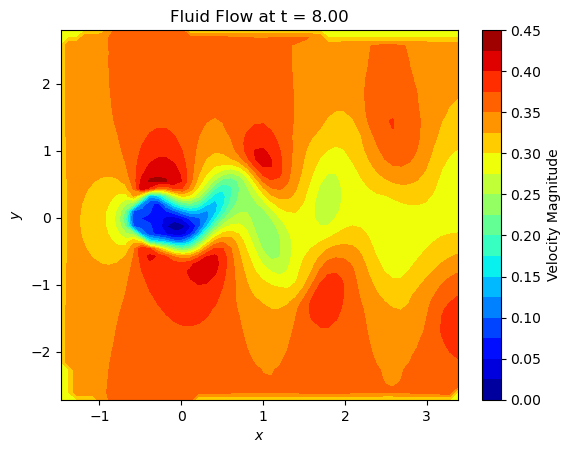

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from matplotlib.patches import Circle

# Load your data
# Assuming you have data loaded as X, Y, Time, U, V
# Here, we just use placeholders for these arrays

# Convert to numpy arrays and flatten
x = X.to_numpy().flatten()
y = Y.to_numpy().flatten()
t = Time.to_numpy().flatten()
u = U.to_numpy().flatten()
v = V.to_numpy().flatten()

# Min-Max Normalization for x and y
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()


# Define grid
x_unique = np.linspace(x.min(), x.max(), 50)
y_unique = np.linspace(y.min(), y.max(), 50)
XX_test, YY_test = np.meshgrid(x_unique, y_unique)

# Initialize plot
fig, ax = plt.subplots()

# Helper function to get velocity magnitude
def get_velocity_magnitude(t_value):
    mask = (t == t_value)
    x_current = x[mask]
    y_current = y[mask]
    u_current = u[mask]
    v_current = v[mask]
    
    # Interpolate to the grid
    grid_u = griddata((x_current, y_current), u_current, (XX_test, YY_test), method='linear', fill_value=0)
    grid_v = griddata((x_current, y_current), v_current, (XX_test, YY_test), method='linear', fill_value=0)
    
    magnitude = grid_u
    return magnitude

# Initial plot
initial_magnitude = get_velocity_magnitude(t.min())
cax = ax.contourf(XX_test, YY_test, initial_magnitude, levels=20, cmap='jet')
cbar = plt.colorbar(cax, ax=ax)
cbar.set_label(r'Velocity Magnitude')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'Fluid Flow')


# Set consistent axis limits
ax.set_xlim([XX_test.min(), XX_test.max()])
ax.set_ylim([YY_test.min(), YY_test.max()])

# Animation function
def animate(i):
    current_t = np.unique(t)[i]
    magnitude = get_velocity_magnitude(current_t)
    cax = ax.contourf(XX_test, YY_test, magnitude, levels=20, cmap='jet')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'Fluid Flow at t = {:.2f}'.format(current_t))


    return cax.collections

# Create animation
ani = FuncAnimation(fig, animate, frames=len(np.unique(t)), interval=100, blit=True)

# Save animation
ani.save('fluid_flow20.gif', writer='imagemagick')

plt.show()


# Boundary and Initial conditions

In [14]:
def boundary_outer(x, on_boundary):
    return on_boundary and rectangle.on_boundary(x)


def boundary_inner(x, on_boundary):
    return on_boundary and cylinder.on_boundary(x)
def func(x):
    return 0


bc_outer1 = dde.icbc.DirichletBC(geomtime, func, boundary_outer, component=0)
bc_outer2 = dde.icbc.DirichletBC(geomtime, func, boundary_outer, component=1)


ic1 = dde.icbc.IC(geomtime,lambda x: u_0 ,lambda _, on_initial: on_initial,component=0)
ic2 = dde.icbc.IC(geomtime,lambda x: v_0,lambda _, on_initial: on_initial,component=1)
ic3 = dde.icbc.IC(geomtime,lambda x: 0,lambda _, on_initial: on_initial,component=2)

In [15]:
N_train = 10000
step = x.shape[0] // N_train

idx = np.arange(0, step * N_train, step)

# Créer les ensembles d'entraînement
x_train = x[idx, :]
y_train = y[idx, :]
t_train = t[idx, :]
u_train = u[idx, :]
v_train = v[idx, :]
ic_u = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), u_train, component=0)
ic_v = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), v_train, component=1)

# Model

In [16]:
net = dde.maps.FNN([3] + [10]*2 + [3], "sin", "Glorot normal")

# Define the model
data = dde.data.TimePDE(
    geomtime, pde, [ic1,ic2,ic3,ic_u,ic_v], num_domain=50000, num_boundary=10000
)
model = dde.Model(data, net)
checkpointer = dde.callbacks.ModelCheckpoint(
     "model/model", verbose=1, save_better_only=True
)
# Compile and train the model
model.compile("adam", lr=1e-3,)
losshistory, train_state = model.train(epochs=10000, callbacks=[checkpointer,])

#model.compile("L-BFGS")
#model.train()


dde.saveplot(losshistory, train_state, issave=True, isplot=True)


Compiling model...
'compile' took 0.983762 s

Training model...



OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 3.95 GiB of which 10.19 MiB is free. Process 238933 has 2.21 GiB memory in use. Process 301242 has 1.17 GiB memory in use. Including non-PyTorch memory, this process has 75.12 MiB memory in use. Of the allocated memory 20.41 MiB is allocated by PyTorch, and 5.59 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)